### Tested on 70k messages and 4 authors maximum. Running time : <5s. Might not be optimized for 1M+ messages ###

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

# Gathering data was done in the previous code "whatsapp_mise_en_place"

Architecture :
- place data files in "work_directory"/data/
- pictures produced will go in "work_directory"/pictures/"name_of_conversation_without_file_extension"/
- txt file produced will go in "work_directory"/results/"name_of_conversation_without_file_extension"/

You have to create those directories before launching the code, change the " " parts according to the names on your machine (automatic creation of folders will be implemented)

# _CHANGE IN THE CODE : nom_conv, couleurs._

In [18]:
nom_conv = 'Conv_1' # the name of the whatsapp conversation without the file extension name (ex: in "Whatsapp.txt" indicate "Whatsapp")

# General analysis

In [19]:
fichier = './data/' + nom_conv + '_compteur.csv' # We are looking for the file that was created with the previous code

# Mainly, we just want a csv file, with a date_hour column, author column, message column, and eventually a "counter" column.

In [20]:
df = pd.read_csv(fichier, parse_dates = ["Date_Heure"] ,dayfirst=True, na_filter=False) #reading the file

In [21]:
ss_auteur_mssg = df[df['Auteur']==''] # Isolation of messages without an author (typically messages for a name change or a picture change)
messages_df = df.drop(ss_auteur_mssg.index).reset_index(drop=True) # We remove them from our dataframe. Be careful about the indexing.

media_mssg = messages_df[messages_df['Message'] == '<Médias omis>'] # Isolation of media messages (pictures, gif,...)
#messages_df = messages_df.drop(media_mssg.index).reset_index(drop=True) # We remove them from our dataframe

#messages_df.head()

In [22]:
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' '))) # We count the number of caracters in every object separated by spaces in the column "Message" to give us the number of words.
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s) - s.count(' ')) # We count the number of caracters in every message in the column "Message" minus the number of spaces in those messages to give us the number of letters.

# we don't distinguish links and special objects so far, they will be considered long words

In [24]:
cmpte_rendu = './results/' + nom_conv + '/' + nom_conv + '_cmpte_rendu.txt' # To name a file that will take the information printed below
rendu = open(cmpte_rendu,"w+")# we open this file in writing mode 

print("\nFor you, the day we created this conversation was the most important day of your life.")
print("For us, it was a {}.".format(messages_df["Date_Heure"][0].day_name())) #Gives us the day when the conversation starts (in fact the date of the first message contained in the data)
rendu.write("For you, the day we created this conversation was the most important day of your life. \nFor us, it was a {}.\n".format(messages_df["Date_Heure"][0].day_name())) #We write it in the file

print("\nCette conversation dure depuis {} jours.".format(pd.Interval(messages_df["Date_Heure"][messages_df["Date_Heure"].idxmin], messages_df["Date_Heure"][messages_df["Date_Heure"].idxmax],closed='both').length.components[0])) # that gives us the length in days of the interval between the first message and the last message
print("\nTout a commencé le {:%d/%m/%Y à %Hh%M}.".format(messages_df["Date_Heure"][0])) # Gives us the date of the first message
print("\nLa fin actuelle est au {:%d/%m/%Y à %Hh%M}.".format(messages_df["Date_Heure"][messages_df["Date_Heure"].idxmax])) # Gives us the date of the last message

rendu.write("\nCette conversation dure depuis {} jours.".format(pd.Interval(messages_df["Date_Heure"][messages_df["Date_Heure"].idxmin], messages_df["Date_Heure"][messages_df["Date_Heure"].idxmax],closed='both').length.components[0])) # We write it in the file
rendu.write("\nTout a commencé le {:%d/%m/%Y à %Hh%M}.".format(messages_df["Date_Heure"][0]))
rendu.write("\nLa fin actuelle est au {:%d/%m/%Y à %Hh%M}.\n".format(messages_df["Date_Heure"][messages_df["Date_Heure"].idxmax]))

print("\nNous avons envoyé {:,d} messages au total.".format(messages_df["Message"].count())) # Gives the number of rows of the column "Message", giving us the total number of messages sent
rendu.write("\nNous avons envoyé {:,d} messages au total.\n".format(messages_df["Message"].count()))

print("\nNous avons envoyé {:,d} mots et {:,d} lettres au total.".format(messages_df["Word_Count"].sum(),messages_df["Letter_Count"].sum())) #Sums the columns "Word_Count" and "Letter_count" to give the total of words and letters sent
rendu.write("\nNous avons envoyé {:,d} mots et {:,d} lettres au total.\n".format(messages_df["Word_Count"].sum(),messages_df["Letter_Count"].sum()))

print("\nNombre moyen de mots par message : {:.1f}.".format(messages_df['Word_Count'].mean())) # Gives the mean of the column "Word_Count", giving us the mean number of words sent
print("\nNombre moyen de lettres par message : {:.1f}.".format(messages_df['Letter_Count'].mean())) # Same with the letters

rendu.write("\nNombre moyen de mots par message : {:.1f}.\n".format(messages_df['Word_Count'].mean()))
rendu.write("\nNombre moyen de lettres par message : {:.1f}.".format(messages_df['Letter_Count'].mean()))

rendu.close() # we close the file


For you, the day we created this conversation was the most important day of your life.
For us, it was a Monday.

Cette conversation dure depuis 513 jours.

Tout a commencé le 28/01/2019 à 13h29.

La fin actuelle est au 24/06/2020 à 18h09.

Nous avons envoyé 74,021 messages au total.

Nous avons envoyé 705,825 mots et 3,179,176 lettres au total.

Nombre moyen de mots par message : 9.5.

Nombre moyen de lettres par message : 42.9.


# Deeper analysis

In [25]:
auteurs = messages_df["Auteur"].unique() #Gives a list of all the authors
couleurs = ['#66b3ff','#ff9999','#99ff99','#ffcc99'] #List of available colors (light blue, light red, light green, light orange)

In [26]:
### Definition of lists that will contain the information to plot ###
nbre_mssg_tot = list(range(len(auteurs))) # Will contain the number of messages per author
tag_mssg_tot = list(range(len(auteurs))) # Will contain the tags for the pie for the number of messages per author

nbre_media_tot = list(range(len(auteurs))) # Will contain the number of media per author
tag_media_tot = list(range(len(auteurs))) # Will contain the tags for the pie for the number of media per author

nbre_word = list(range(len(auteurs))) # Will contain the number of words per author
tag_word = list(range(len(auteurs))) # Tag for the pie for the number of words per author

nbre_letter = list(range(len(auteurs))) # Will contain the number of letters per author
tag_letter = list(range(len(auteurs))) # Tag for the pie for the number of words per author

mean_letter = list(range(len(auteurs))) # Will contain the mean number of letters per message per author
mean_word = list(range(len(auteurs))) # Will contain the mean number of words per message per author

coloris = list(range(len(auteurs))) # Will contain the color for each author

explosion = list(range(len(auteurs))) # For the "explode" pie parameter, to adjust it to the number of authors

### Calculation of the information ###
for i in range(len(auteurs)):
    temp = messages_df[messages_df['Auteur']==auteurs[i]]
    temp_media = media_mssg[media_mssg['Auteur']==auteurs[i]]
    
    nbre_mssg_tot[i] = temp['Message'].count()
    nbre_media_tot[i] = temp_media['Message'].count()
    
    nbre_letter[i] = temp['Letter_Count'].sum()
    nbre_word[i] = temp['Word_Count'].sum()
    
    mean_letter[i] = temp['Letter_Count'].mean()
    mean_word[i] = temp['Word_Count'].mean()
    
    tag_mssg_tot[i] = "{}: \n {:,d}  messages".format(str(auteurs[i]),nbre_mssg_tot[i])
    tag_media_tot[i] = "{}: \n {:,d}  media".format(str(auteurs[i]),nbre_media_tot[i])
    tag_letter[i] = "{}: \n {:,d}  lettres".format(str(auteurs[i]),nbre_letter[i])
    tag_word[i] = "{}: \n {:,d}  mots".format(str(auteurs[i]),nbre_word[i]) 
    
    coloris[i] = couleurs[i]
    explosion[i] = 0.02 # slightly explodes pie figures

# Figures

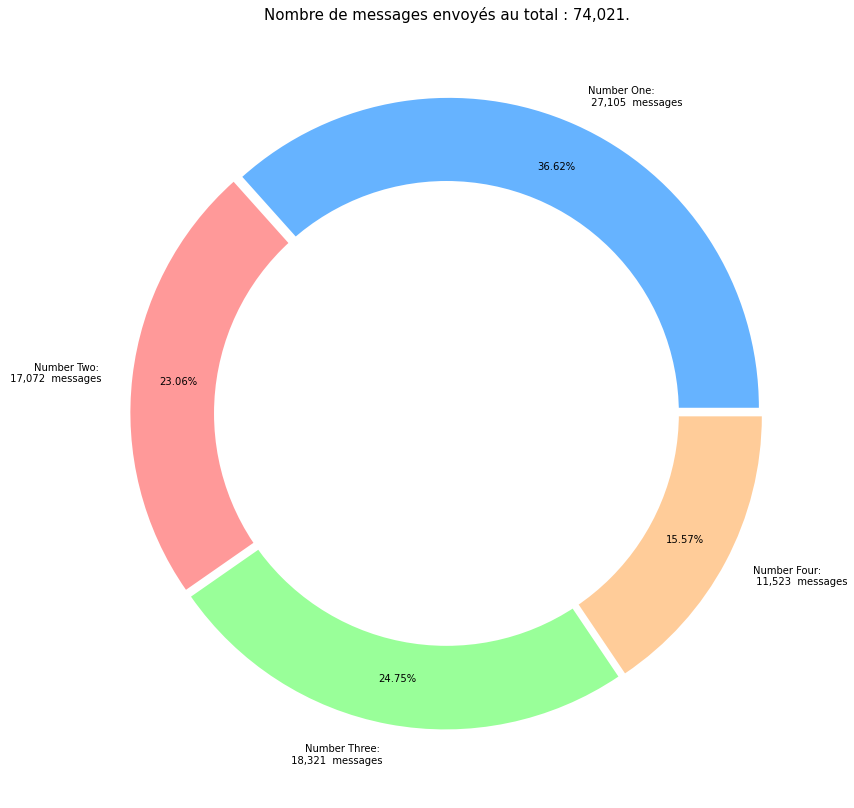

In [27]:
plt.figure(figsize=(12,12))
plt.title("Nombre de messages envoyés au total : {:,d}.".format(messages_df["Message"].count()),fontsize=15)
plt.pie(nbre_mssg_tot,labels=tag_mssg_tot, autopct='%1.2f%%',explode=explosion, colors = couleurs, pctdistance=0.85)#, wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True}) 
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect
plt.tight_layout()
plt.savefig('./results/' + nom_conv + '/images/' + nom_conv+ '_prctg_global.png');

plt.show();

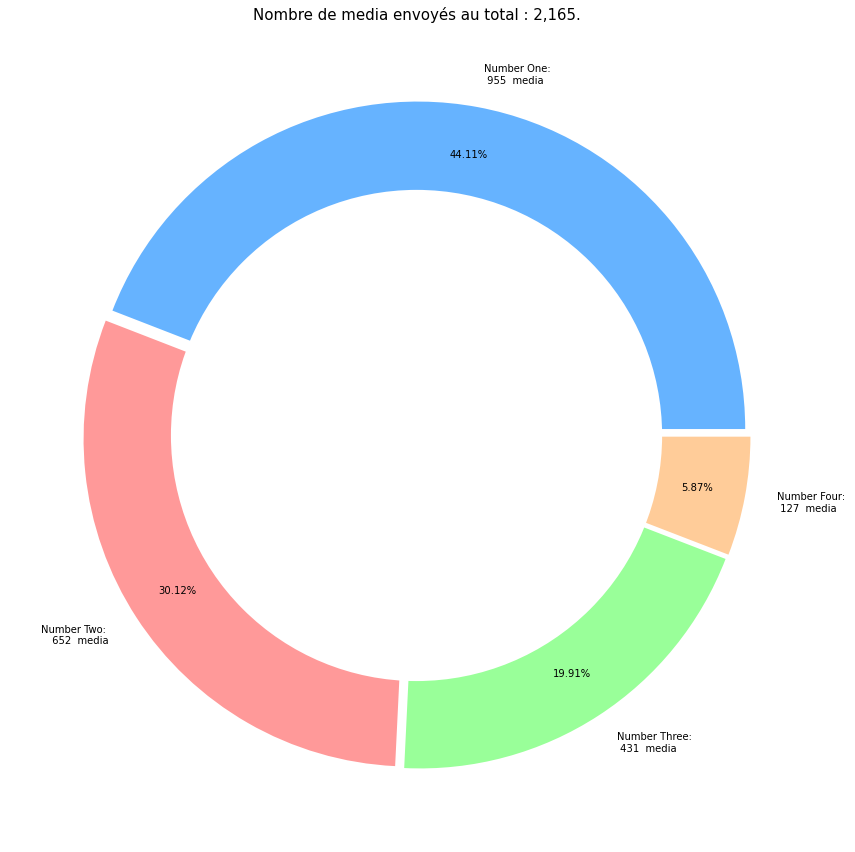

In [30]:
plt.figure(figsize=(12,12))
plt.title("Nombre de media envoyés au total : {:,d}.".format(media_mssg["Message"].count()),fontsize=15)
plt.pie(nbre_media_tot, labels=tag_media_tot, autopct='%1.2f%%',explode=explosion, colors = couleurs, pctdistance=0.85)#, wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True}) 
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect
plt.tight_layout()
plt.savefig('./results/' + nom_conv + '/images/' + nom_conv+ '_prctg_global_media.png');
plt.show();

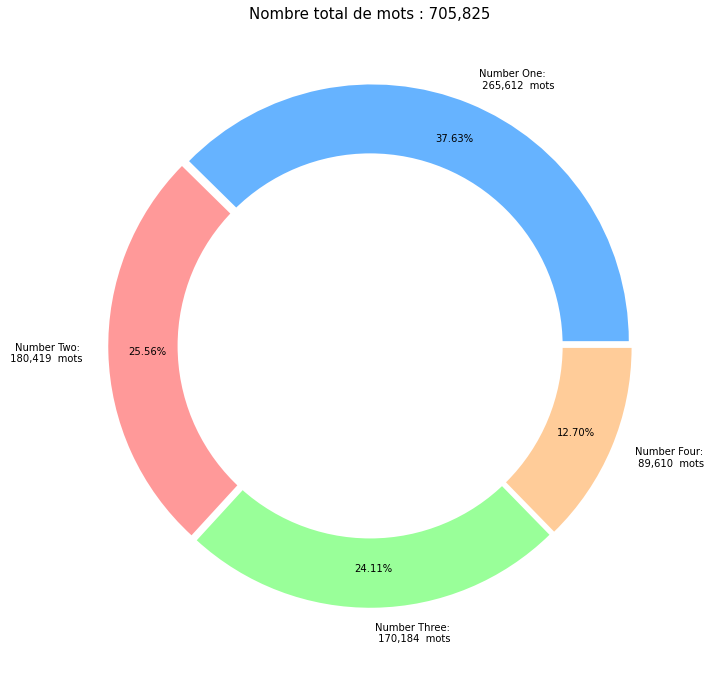

In [31]:
plt.figure(figsize=(10,10))
plt.title("Nombre total de mots : {:,d}".format(messages_df["Word_Count"].sum()),fontsize=15)
plt.pie(nbre_word, labels=tag_word, autopct='%1.2f%%',explode=explosion, colors = couleurs, pctdistance=0.85)#, wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True}) 
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect
plt.tight_layout()
plt.savefig('./results/' + nom_conv + '/images/' + nom_conv + '_prctg_global_mots.png');
plt.show();

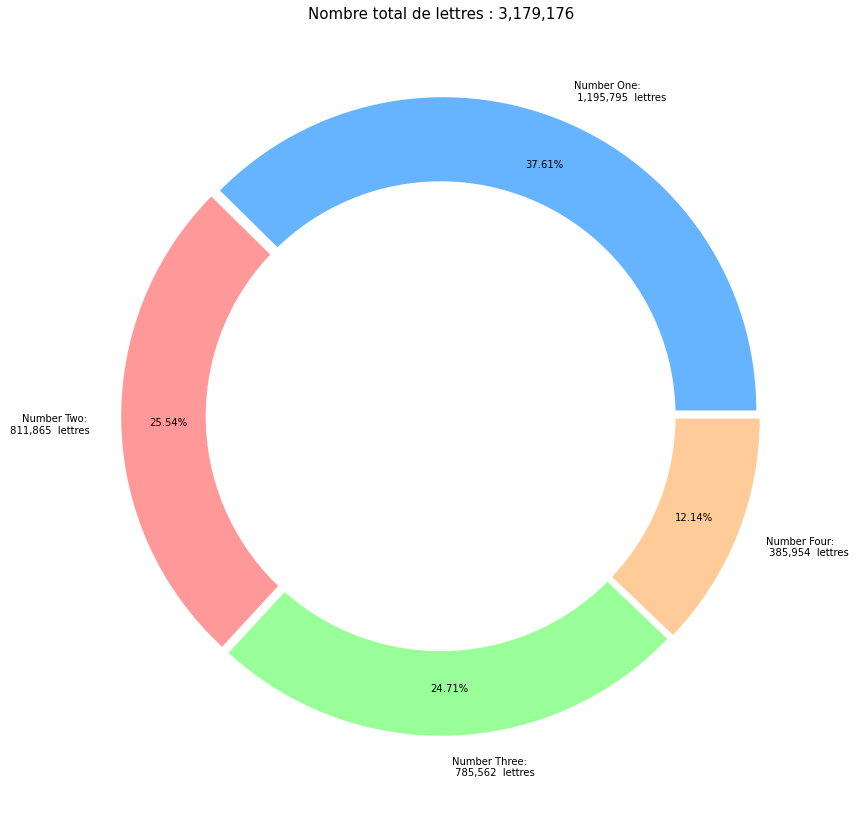

In [32]:
plt.figure(figsize=(12,12))
plt.title("Nombre total de lettres : {:,d}".format(messages_df["Letter_Count"].sum()),fontsize=15)
plt.pie(nbre_letter, labels=tag_letter, autopct='%1.2f%%',explode=explosion, colors = couleurs, pctdistance=0.85)#, wedgeprops={"edgecolor":"k",'linewidth': 1, 'antialiased': True}) 
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect
plt.tight_layout()
plt.savefig('./results/' + nom_conv + '/images/' + nom_conv + '_prctg_global_lettres.png');
plt.show();

In [33]:
discrete_columns = ['Date_Heure', 'Auteur', 'Message']
messages_df[discrete_columns].describe()

,Date_Heure,Auteur,Message
count,74021,74021,74021
unique,32810,4,65215
top,2019-10-11 20:32:00,Number One,<Médias omis>
freq,35,27105,2165
first,2019-01-28 13:29:00,NaN,NaN
last,2020-06-24 18:09:00,NaN,NaN


In [34]:
continuous_columns = ['Letter_Count', 'Word_Count']
messages_df[continuous_columns].describe()

,Letter_Count,Word_Count
count,74021.000000,74021.000000
mean,42.949649,9.535470
std,59.854935,12.516749
min,1.000000,1.000000
25%,14.000000,3.000000
50%,30.000000,7.000000
75%,54.000000,12.000000
max,5537.000000,1181.000000


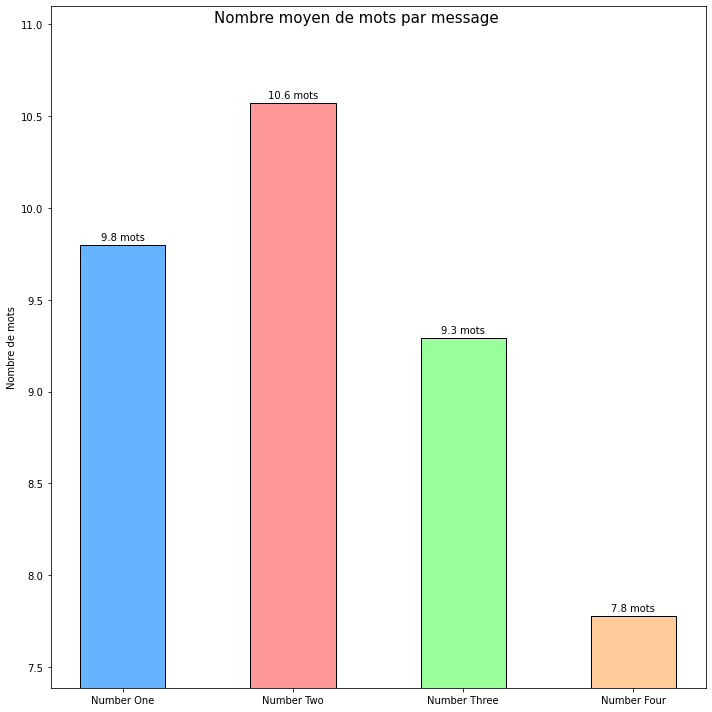

In [36]:
labels = auteurs
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Nombre moyen de mots par message', fontsize=15)
rects1 = ax.bar(x, mean_word, color = couleurs, width = 0.5, align = 'center',edgecolor = 'k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre de mots')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim(min(mean_word)*0.95,max(mean_word)*1.05)

#plt.hlines(y=min(mean_word)*0.97,xmin=-.5,xmax=3.3)
#plt.annotate("{:,.0f} mots".format(min(mean_letter)*0.97),(-.0,min(mean_letter)*0.975))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f} mots'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)

fig.tight_layout()
plt.savefig('./results/' + nom_conv + '/images/' + nom_conv+ '_nbre_moyen_mots_par_message.png');
plt.show();

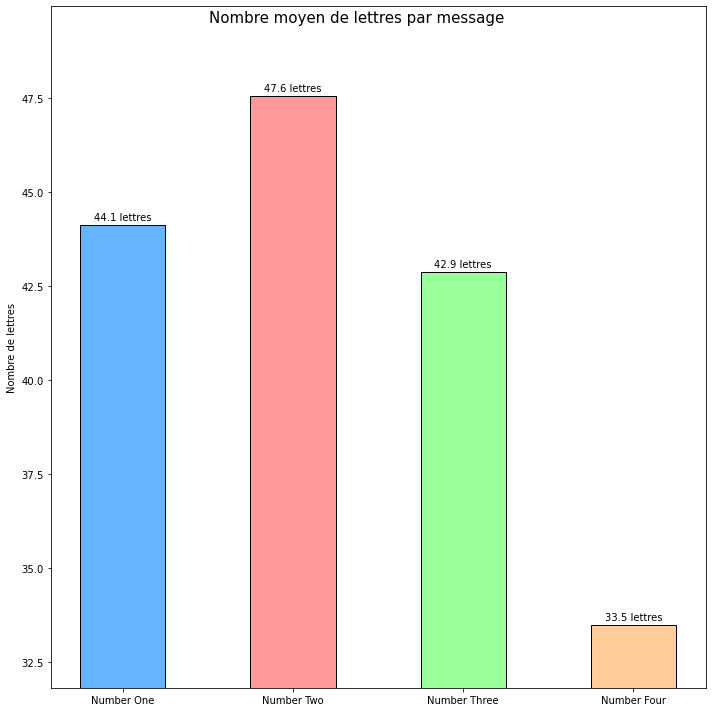

In [37]:
labels = auteurs
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Nombre moyen de lettres par message', fontsize=15)

rects1 = ax.bar(x, mean_letter, color = couleurs, width = 0.5, align = 'center',edgecolor = 'k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre de lettres')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim(min(mean_letter)*0.95,max(mean_letter)*1.05) # changing the y axis so it focuses on the top

#plt.hlines(y=min(mean_letter)*0.97,xmin=-.5,xmax=3.3)
#plt.annotate("{:,.0f} lettres".format(min(mean_letter)*0.97),(-.6,min(mean_letter)*0.975))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f} lettres'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)

fig.tight_layout()
plt.savefig('./results/' + nom_conv + '/images/' + nom_conv+ '_nbre_moyen_lettres_par_message.png');
plt.show();

# Partie développement en cours

#### - évolution des messages au cours du temps (par auteur ?)
#### - groupement par jour/heure/minute en moyenne pour messages/lettres/mots et par auteur
#### - jour le plus prolifique en messages/mots/lettres
#### - jour le moins prolifique en messages/mots/lettres
##### - analyse du texte à proprement parler

In [75]:
#messages_df["Count"]=1
#for i in range(len(messages_df)):
#    messages_df["Count"][i]=i+1

In [76]:
#messages_df["mssg_count"]=1

In [77]:
messages_df.head()

,Date_Heure,Auteur,Message,Compteur,Word_Count,Letter_Count
0,2019-01-28 13:29:00,Number One,Bon!,1.0,1,4
1,2019-01-28 13:30:00,Number One,Lequel de vous deux est l'enfant de putain qui...,2.0,16,65
2,2019-01-28 13:53:00,Number Two,Number Three a bien ri à ce message alors je s...,1.0,14,53
3,2019-01-28 13:54:00,Number Two,*pousse Number Three sous le bus*,2.0,6,28
4,2019-01-28 14:07:00,Number One,Tu lui dira d'aller voir un medecin quand meme...,3.0,17,68


In [78]:
months = messages_df.groupby(messages_df.Date_Heure.dt.month).count()

In [79]:
months.head()

,Date_Heure,Auteur,Message,Compteur,Word_Count,Letter_Count
Date_Heure,,,,,,
1,2702,2702,2702,2702,2702,2702
2,5155,5155,5155,5155,5155,5155
3,6197,6197,6197,6197,6197,6197
4,12293,12293,12293,12293,12293,12293
5,15314,15314,15314,15314,15314,15314


In [80]:
months["Auteur"]

Date_Heure
1      2702
2      5155
3      6197
4     12293
5     15314
6      8440
7      4322
8      6805
9      4129
10     4066
11     1999
12     2599
Name: Auteur, dtype: int64

In [81]:
months.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='Date_Heure')

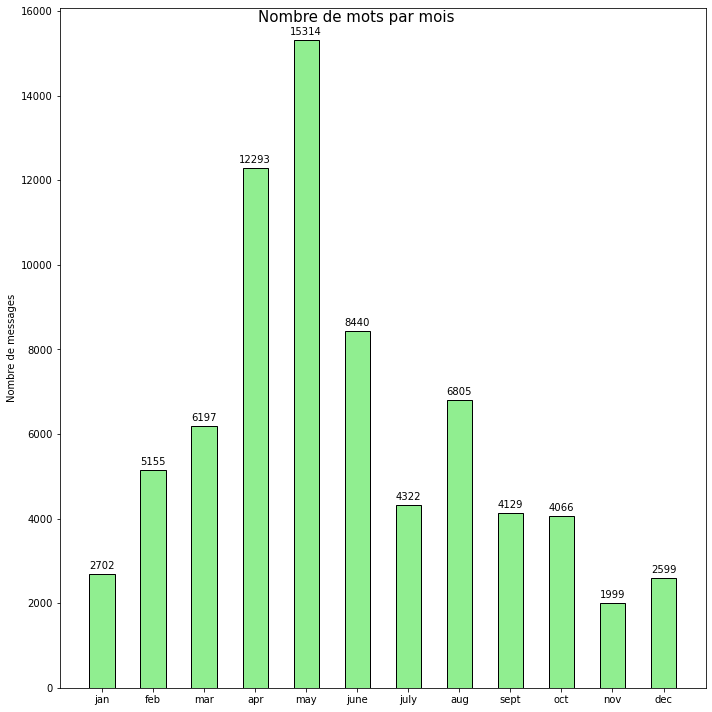

In [82]:
labels = ["jan", "feb", "mar", "apr", "may", "june", "july", "aug", "sept", "oct", "nov", "dec"]
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Nombre de mots par mois', fontsize=15)

rects1 = ax.bar(x, months["Auteur"], color ='lightgreen', width = 0.5, align = 'center',edgecolor = 'k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre de messages')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#plt.ylim(min(mean_letter)*0.95,max(mean_letter)*1.05) # changing the y axis so it focuses on the top

#plt.hlines(y=min(mean_letter)*0.97,xmin=-.5,xmax=3.3)
#plt.annotate("{:,.0f} lettres".format(min(mean_letter)*0.97),(-.6,min(mean_letter)*0.975))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)

fig.tight_layout()
plt.savefig('./results/' + nom_conv + '/images/' + nom_conv+ '_nbre_messages_par_mois.png');
plt.show();

In [83]:
hours = messages_df.groupby(messages_df.Date_Heure.dt.hour).count()

In [84]:
#hours["mssg_count"].sum()

In [85]:
hours.head()

,Date_Heure,Auteur,Message,Compteur,Word_Count,Letter_Count
Date_Heure,,,,,,
0,4069,4069,4069,4069,4069,4069
1,2553,2553,2553,2553,2553,2553
2,738,738,738,738,738,738
3,207,207,207,207,207,207
4,25,25,25,25,25,25


In [86]:
normhour = (hours["Auteur"]/hours["Auteur"].sum())*100

In [87]:
normhour

Date_Heure
0     5.497089
1     3.449021
2     0.997014
3     0.279650
4     0.033774
5     0.041880
6     0.035125
7     0.117534
8     0.609287
9     1.622513
10    3.561152
11    5.655152
12    6.658921
13    6.591373
14    8.012591
15    6.715662
16    5.235001
17    6.391429
18    5.414680
19    5.032356
20    6.002351
21    5.869956
22    7.928831
23    8.247659
Name: Auteur, dtype: float64

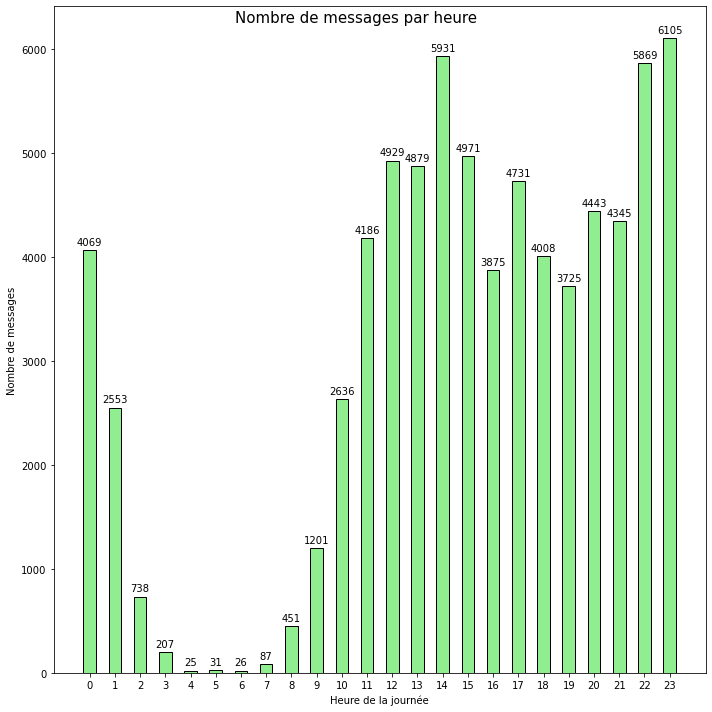

In [88]:
labels = hours.index
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Nombre de messages par heure', fontsize=15)

rects1 = ax.bar(x, hours["Auteur"], color ='lightgreen', width = 0.5, align = 'center',edgecolor = 'k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nombre de messages')
ax.set_xlabel('Heure de la journée')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#plt.ylim(min(mean_letter)*0.95,max(mean_letter)*1.05) # changing the y axis so it focuses on the top

#plt.hlines(y=min(mean_letter)*0.97,xmin=-.5,xmax=3.3)
#plt.annotate("{:,.0f} lettres".format(min(mean_letter)*0.97),(-.6,min(mean_letter)*0.975))

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)

fig.tight_layout()
plt.savefig('./results/' + nom_conv + '/images/' + nom_conv+ '_nbre_messages_par_heure.png');
plt.show();